Oppgave 1)

In [13]:
import numpy as np                
import matplotlib.pyplot as plt          

def euler_cromer_approx(theta0, w0, dt, T):
    """
    Calculates angular displacement and angular velocity 
    using the Euler-Cromer method 
    """
    N = int(T/dt)
    t = np.linspace(0, T, N + 1)
    theta, w = np.zeros(N+1), np.zeros(N+1)
    theta[0], w[0] = theta0, w0
    for i in range(N):
        w[i+1] = w[i] - g/l*theta[i]*dt
        theta[i+1] = theta[i] + w[i+1]*dt
    return theta, w, t

def RK4_step(RHS, vals, t, dt):
    """
    Calculates one step of the RK4-algorithm.
    
    RHS: (callable) function representing the right hand side of the differential equations
    vals: (numpy array) previous values of theta and omega, [theta, omega] 
    t: (float) previous time
    dt: (float) timestep
    
    return: (array) next values [theta_next, omega_next]
    """
    k1 = RHS(t, vals)   
    k2 = RHS(t+dt/2, vals+(dt/2)*k1)
    k3 = RHS(t+dt/2, vals+(dt/2)*k2)
    k4 = RHS(t+dt, vals+dt*k3)
    return vals + (dt/6)*(k1 + (2*k2) + (2*k3) + k4)


def RK4_method(RHS, theta0, w0, dt, T):
    """
    Computes theta and w (omega).  
    
    Parameters
    -----------
    RHS: RHS of the differential equation 
    theta0: initial value of theta
    w0: initial value of omega
    dt: timestep
    T: max t
    
    return theta, w, t
    """

    n = int(T/dt) 
    t = np.linspace(0, T, n + 1)
    theta, w = np.zeros(n + 1), np.zeros(n + 1)
    theta[0], w[0] = theta0, w0
    
    for i in range(n):
        theta[i+1], w[i+1] = RK4_step(RHS, np.array([theta[i], w[i]]), t[i], dt) 
         
    return theta, w, t


def equation(t, vals):
    """
    Calculates the RHS of the differential equations given an array (vals) which contains the parameters

    Parameters
    -----------
    t: (float) time
    vals: (array) values of theta and omega, [theta, omega] 
    
    Returns
    -------
    array with values of the RHS of the equations.
    """
    dw = -q*vals[1] - g/l*vals[0] + Fd*np.sin(wd*t)
    dtheta = vals[1]
    return np.array([dtheta, dw])


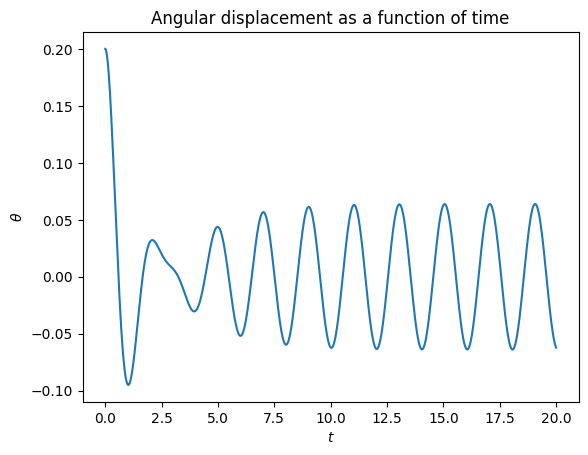

In [14]:
# Parameters

l = 1           # length of string
g = 9.8         # gravitational acceleration
theta0 = 0.2    # initial angle
w0 = 0          # initial angular velocity
q = 1           # damping coefficient
wd = 3.13       # driving frequency
Fd = 0.2        # driving force amplitude

dt = 0.01   
T = 20

# Compute and plot the solution

theta, w, t = RK4_method(equation, theta0, w0, dt, T)

plt.plot(t, theta)
plt.xlabel(r'$t$')
plt.ylabel(r'$\theta$')
plt.title("Angular displacement as a function of time")
plt.show()


Oppgave 2)

In [15]:
def total_energy(theta, w):
    """ Calculates total energy """
    return 1/2*g*l*theta**2 + 1/2*l**2*w**2

def convergence_test_energy_RK4():
    T = 10
    N=100
    dt_min = 0.001
    dt_max = 0.1
    dt_array = np.geomspace(dt_min, dt_max, N) 
    diff_array = np.empty(N)
    
    for i in range(N):
        theta, w, t = RK4_method(equation, theta0, w0, dt_array[i], T) 
        E_total = total_energy(theta, w) 
        diff_array[i] = np.abs(E_total[-1])
        
    return diff_array, dt_array

def convergence_test_energy_euler_cromer():
    T = 10
    N=100
    dt_min = 0.001
    dt_max = 0.1
    dt_array = np.geomspace(dt_min, dt_max, N) 
    diff_array = np.empty(N)
    
    for i in range(N):
        theta, w, t = euler_cromer_approx(theta0, w0, dt_array[i], T) 
        E_total = total_energy(theta, w) 
        diff_array[i] = np.abs(E_total[-1])
        
    return diff_array, dt_array

diff_RK4, dt_RK4 = convergence_test_energy_RK4()
diff_euler_cromer, dt_euler_cromer = convergence_test_energy_euler_cromer()


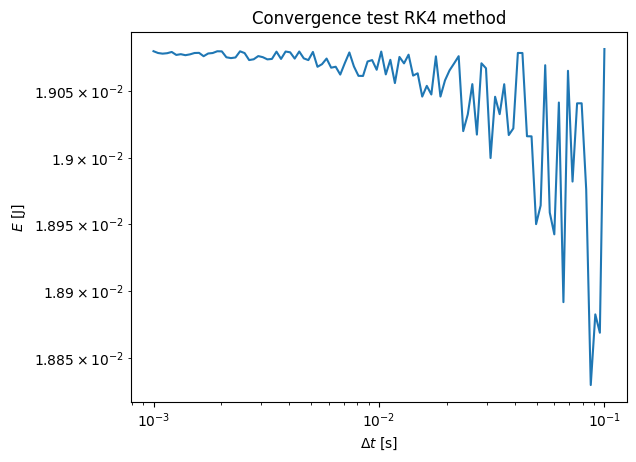

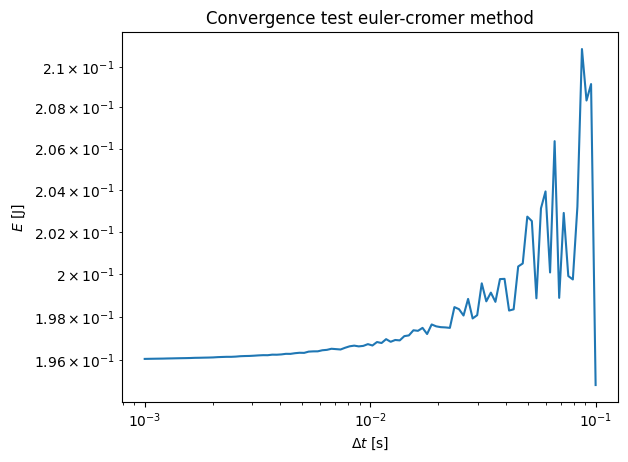

In [16]:

plt.loglog(dt_RK4, diff_RK4, label = 'RK4 method')
plt.title('Convergence test RK4 method')
plt.xlabel(r'$\Delta t$ [s]')
plt.ylabel(r'$E$ [J]')
plt.show()

plt.loglog(dt_euler_cromer, diff_euler_cromer, label = 'RK4 method')
plt.title('Convergence test euler-cromer method')
plt.xlabel(r'$\Delta t$ [s]')
plt.ylabel(r'$E$ [J]')
plt.show()



Ser at 0.01 er et tilstrekkelig lite tidsteg siden usikkerheten i total energien er liten når delta t er 0.01.


Oppgave 3)

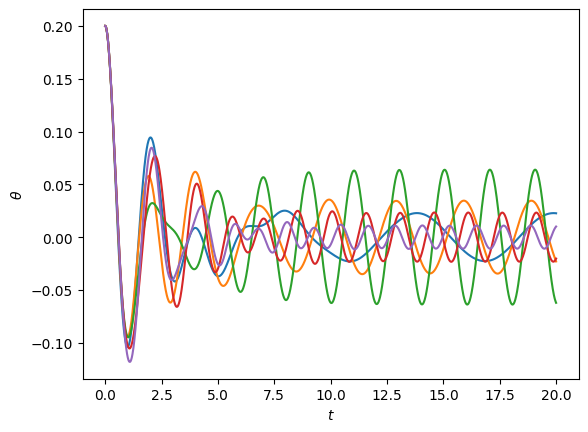

In [17]:
max_theta0 = []
for wd in [3.13*0.33, 3.13*0.67, 3.13, 3.13*1.33, 3.13*1.67]:
    theta, w, t = RK4_method(equation, theta0, w0, dt, T)
    max_theta0.append(max(theta[int(len(theta)/2):]))
    plt.plot(t, theta, label=f'wd = {wd}')
    plt.xlabel(r'$t$')
    plt.ylabel(r'$\theta$')


Text(0, 0.5, 'ressonance freq')

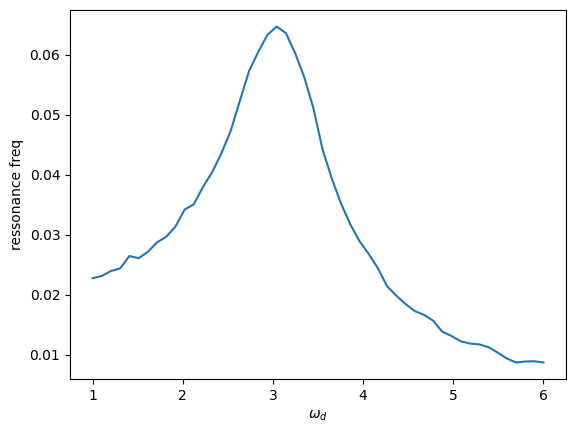

In [18]:
wd_list = np.linspace(1, 6, 50)
max_theta = []
for wd in wd_list:
    theta, w, t = RK4_method(equation, theta0, w0, dt, T)
    max_theta.append(max(theta[int(len(theta)/2):]))

plt.plot(wd_list, max_theta)
plt.xlabel(r'$\omega_d$')
plt.ylabel('ressonance freq')


Oppgave 4)

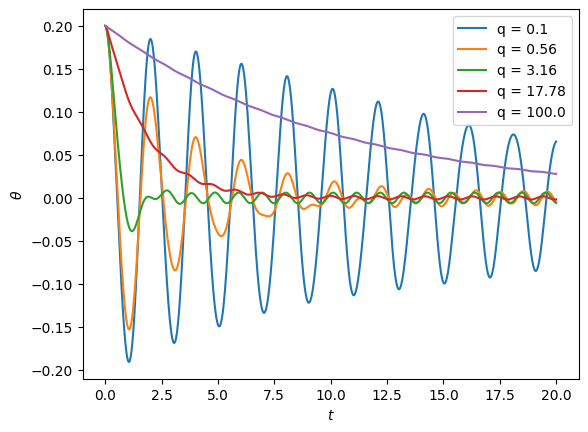

In [19]:
q_list = np.geomspace(0.1, 100, 5)
q_list = [round(q, 2) for q in q_list]
max_theta = []
for q_ in q_list:
    q = q_
    theta, w, t = RK4_method(equation, theta0, w0, dt, T)
    max_theta.append(max(theta[int(len(theta)/2):]))
    plt.plot(t, theta, label=f'q = {q}')
plt.xlabel(r'$t$')
plt.ylabel(r'$\theta$')
plt.legend(loc='upper right')


Oppgave 5)

[0.1, 0.22, 0.46, 1.0, 2.15, 4.64, 10.0, 21.54, 46.42, 100.0]


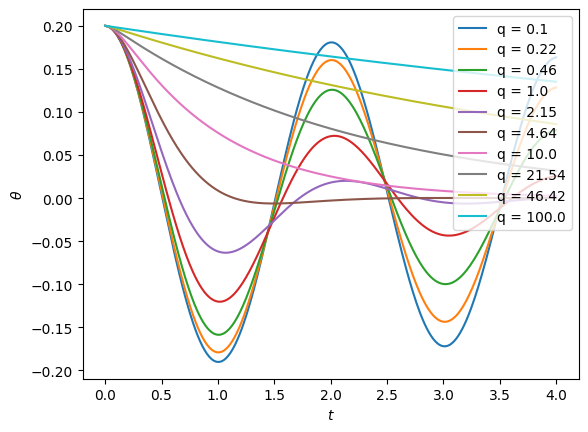

In [20]:
Fd = 0
T = 4
q_list = np.geomspace(0.1, 100, 10)
q_list = [round(q, 2) for q in q_list]
print(q_list)
max_theta = []
for q_ in q_list:
    q = q_
    theta, w, t = RK4_method(equation, theta0, w0, dt, T)
    max_theta.append(max(theta[int(len(theta)/2):]))
    plt.plot(t, theta, label=f'q = {q}')
plt.xlabel(r'$t$')
plt.ylabel(r'$\theta$')
plt.legend(loc='upper right')


Observerer at det forekommer overkritisk demping når firksjonskoeffisienten er veldig høy som f.eks. 100. Når den er rundt 6 derimot observerer vi kritisk dempning. når den er lavere en dette er det underkristisk dempning.